# - 단일로에서 사고가 났을 때 차종들간의 상관관계

In [ ]:
import warnings

warnings.filterwarnings(action='ignore') 
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
Singleway = pd.read_excel('C:\\Users\\LG\Desktop\\빅데이터\\과제\\시흥시 프로젝트\\단일로-차종.xlsx')
Singleway

,car,ban,lorry,specialcar,two-wheeled vehicle,prime mover,bicycle,construction machinery,farm machinery,single-way
0,1588,177,329,10,91,28,13,19,0,1100
1,1480,171,304,14,71,23,22,15,1,1053
2,1474,187,357,9,83,33,22,15,0,1109
3,1307,170,286,12,59,31,17,15,0,917
4,1286,141,332,4,46,32,31,23,0,909
5,1549,172,364,6,59,53,35,21,1,1143
6,1452,161,302,10,66,50,36,38,0,1148
7,1435,147,354,19,81,27,42,30,0,1157
8,1569,159,392,22,133,21,47,39,1,1178
9,1451,126,378,25,154,50,57,23,1,1076


In [4]:
# X, Y 분할하기
Y = intersection['single-way']
X = intersection.drop(['single-way'], axis=1, inplace=False)

In [5]:
# 훈련용 데이터와 평가용 데이터 분할하기
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=156)

In [6]:
# 선형회귀분석 : 모델 생성
lr = LinearRegression()

In [7]:
# 선형회귀분석 : 모델 훈련
lr.fit(X_train, Y_train)

LinearRegression()

In [8]:
# 선형회귀분석 : 평가 데이터에 대한 예측 수행 -> 예측 결과 Y_predict 구하기
Y_predict = lr.predict(X_test)

In [9]:
mse = mean_squared_error(Y_test, Y_predict)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('R^2(Variance score) : {0:.3f}'.format(r2_score(Y_test, Y_predict)))

MSE : 17141.604, RMSE : 130.926
R^2(Variance score) : -0.183


In [10]:
print('Y 절편 값: ', lr.intercept_)
print('회귀 계수 값: ', np.round(lr.coef_, 1))

Y 절편 값:  -123.96379746645744
회귀 계수 값:  [ 0.5 -0.2  2.1  0.9 -1.2 -3.2  1.3  0.6  0. ]


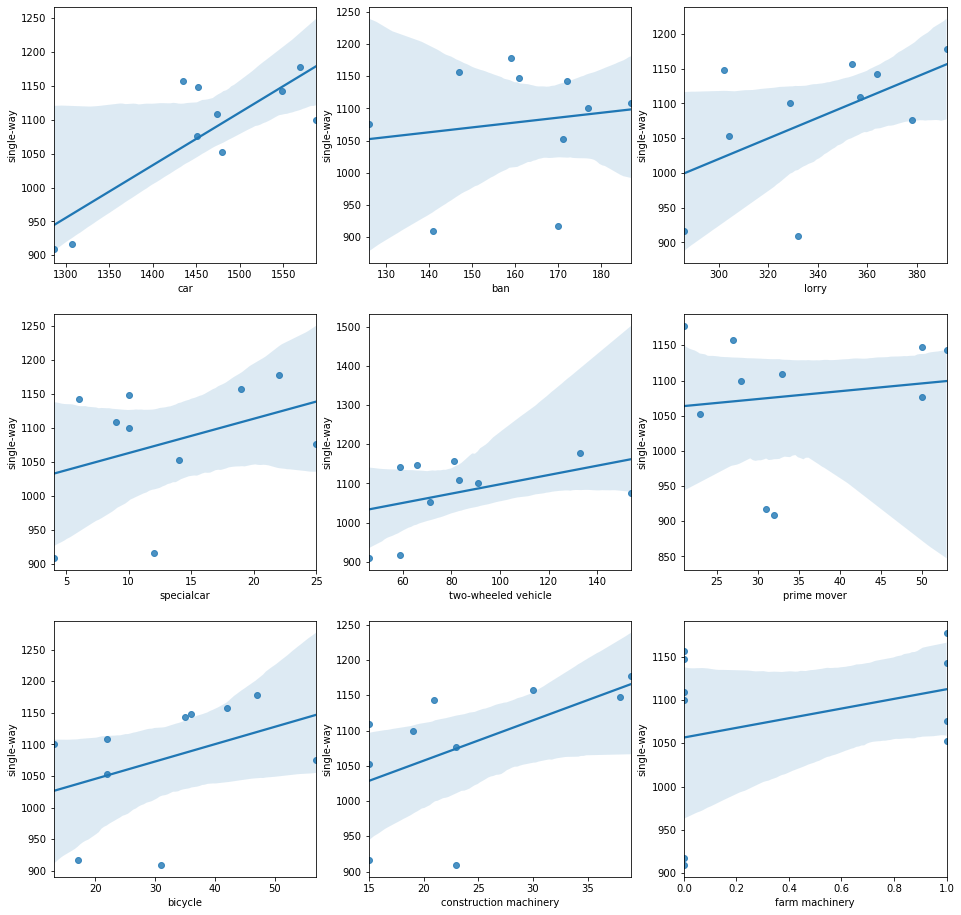

In [11]:
fig, axs = plt.subplots(figsize=(16, 16), ncols=3, nrows=3)

x_features = ['car', 'ban', 'lorry', 'specialcar', 'two-wheeled vehicle', 'prime mover', 'bicycle', 'construction machinery', 'farm machinery']


for i, feature in enumerate(x_features):
      row = int(i/3)
      col = i%3
      sns.regplot(x=feature, y='single-way', data=Singleway, ax=axs[row][col])